<a href="https://colab.research.google.com/github/MariiaKalinina/Elasticity/blob/main/PDF_paper_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
from math import *
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}



In [3]:
path_to_ser = Path("/content/Log.xlsx")
df_ues = pd.read_excel(path_to_ser, skiprows=0)

In [4]:
df_ues

,AR thermal,AR electrical,AR elastic
0,0.066681,0.069183,0.057280
1,0.134276,0.087096,0.071969
2,0.131826,0.104713,0.108143
3,0.122462,0.095499,0.078705
4,0.081658,0.072444,0.078705
5,0.144544,0.063096,0.130103
6,0.149968,0.072444,0.130103
7,0.120226,0.079433,0.048497
8,0.158489,0.069183,0.046928
9,0.124738,0.071340,0.087671


In [5]:
import matplotlib.pyplot as plt

# Пример данных
data = df_ues['TC']

# Построение гистограммы
plt.hist(data, bins=6, alpha=0.7, color='blue')
plt.title('Гистограмма распределения')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

KeyError: 'TC'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Пример логарифмических данных
# data = np.log10(data)
# print(data)
# data = np.random.lognormal(mean=0, sigma=1, size=1000)
data = df_ues['TC']
data_log = np.log10(data)

# Построение гистограммы
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Подбор логнормального распределения
shape, loc, scale = stats.lognorm.fit(data, floc=0)

# Построение логнормальной кривой
x = np.linspace(min(data), max(data), 100)
print(max(data))
pdf = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'r-', lw=2)

plt.title('Гистограмма и подгонка логнормального распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

# Example DataFrame creation, replace this with your actual DataFrame
# df_ues = pd.DataFrame({'TC': np.random.normal(loc=0, scale=1, size=100)})

data = df_ues['TC'].dropna().tolist()  # Ensure data is clean by dropping NaNs

# Параметры нормального распределения
mu, std = norm.fit(data)

# Генерация значений для кривой
xmin, xmax = -3, 3  # Set limits for x if not predefined, adjust as necessary
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Построение гистограммы и наложение кривой
plt.hist(data, bins=10, density=True, alpha=0.7, color='blue')
plt.plot(x, p, 'k', linewidth=2)
plt.title('Гистограмма с наложенной кривой нормального распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.gca().set_xscale('log')
plt.xlim(10**-3, 10**0)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# Example DataFrame creation, replace this with your actual DataFrame
df_ues = pd.DataFrame({'TC': np.random.lognormal(mean=0, sigma=1, size=100)})

data = df_ues['TC'].dropna()  # Ensure data is clean by dropping NaNs
# data_log = np.log(data)  # Use natural log for compatibility with lognorm

# Fit the log-normal distribution (scipy's lognorm takes 's' as the shape parameter, which is sigma)
sigma, loc, scale = lognorm.fit(data, floc=0)  # Fixing location to zero

# Generate values for the curve
xmin, xmax = data_log.min(), data_log.max()  # Set limits for x based on the data range
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, sigma, loc=loc, scale=scale)  # Get PDF values

# Transform x and p back to the original scale for correct plotting
x_transformed = np.exp(x)
p_transformed = p / x_transformed  # Adjust PDF for the transformation

# Plot the histogram and overlay the curve
plt.hist(data, bins=6, density=True, alpha=0.7, color='blue')
plt.plot(x_transformed, p_transformed, 'k', linewidth=2)
plt.title('Гистограмма с наложенной кривой логнормального распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')

plt.show()

In [8]:
path_to_ser = Path("/content/Log.xlsx")
df_ues = pd.read_excel(path_to_ser, skiprows=0)

data = df_ues['AR thermal'].dropna()  # Ensure data is clean by dropping NaNs
data_elec = df_ues['AR electrical'].dropna()  # Ensure data is clean by dropping NaNs
data_elas = df_ues['AR elastic'].dropna()  # Ensure data is clean by dropping NaNs

In [ ]:
df_ues.columns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# Example DataFrame creation, replace this with your actual DataFrame
# df_ues = pd.DataFrame({'TC': np.random.lognormal(mean=0, sigma=1, size=100)})

data = df_ues['AR thermal'].dropna()  # Ensure data is clean by dropping NaNs
data_elec = df_ues['AR electrical'].dropna()  # Ensure data is clean by dropping NaNs
data_elas = df_ues['AR elastic'].dropna()  # Ensure data is clean by dropping NaNs

# Fit the log-normal distribution (scipy's lognorm takes 's' as the shape parameter, which is sigma)
sigma, loc, scale = lognorm.fit(data, floc=0)  # forcing location to zero
sigma1,loc1, scale1 = lognorm.fit(data_elec, floc=0)  # forcing location to zero
sigma2,loc2, scale2 = lognorm.fit(data_elas, floc=0)  # forcing location to zero

# Generate values for the curve
xmin, xmax = data.min(), data.max()  # Set limits for x based on the data range
x = np.linspace(10**-3, 10**0, 500)
p = lognorm.pdf(x, sigma, loc, scale)
p1 = lognorm.pdf(x, sigma1, loc1, scale1)
p2 = lognorm.pdf(x, sigma2, loc2, scale2)

# Plot the histogram and overlay the curve
plt.hist(data, bins=7, density=True, alpha=0.7, color='blue')
plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, p1, 'k', linewidth=2)
plt.plot(x, p2, 'k', linewidth=2)
plt.title('Гистограмма с наложенной кривой логнормального распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')

# Set x-axis to log scale
plt.gca().set_xscale('log')
plt.xlim(10**-3, 10**0)

plt.show()

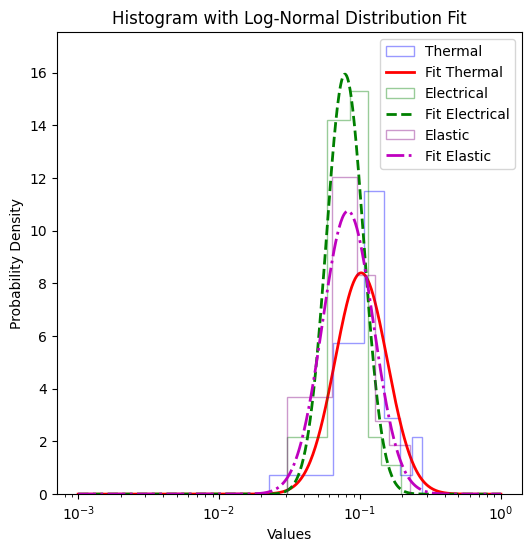

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# Assuming df_ues is your DataFrame and it's already defined
# data = df_ues['AR thermal'].dropna()
# data_elec = df_ues['AR electrical'].dropna()
# data_elas = df_ues['AR elastic'].dropna()

# Ensure all data is positive by filtering out non-positive values
data = data[data > 0]
data_elec = data_elec[data_elec > 0]
data_elas = data_elas[data_elas > 0]

# Fit the log-normal distribution
try:
    sigma, loc, scale = lognorm.fit(data, floc=0)
    sigma1, loc1, scale1 = lognorm.fit(data_elec, floc=0)
    sigma2, loc2, scale2 = lognorm.fit(data_elas, floc=0)

    # Generate values for the curve
    # x = np.logspace(np.log10(min(data.min(), data_elec.min(), data_elas.min())),
    #                 np.log10(max(data.max(), data_elec.max(), data_elas.max())), 500)

    x = np.logspace(-3, 0, 500)
    p = lognorm.pdf(x, sigma, loc, scale)
    p1 = lognorm.pdf(x, sigma1, loc1, scale1)
    p2 = lognorm.pdf(x, sigma2, loc2, scale2)

    bin_amount = 6

    # Plot the histogram and overlay the curve
    plt.figure(figsize=(6, 6))
    plt.hist(data, bins=bin_amount, density=True, alpha=0.4, color='blue', label='Thermal', histtype='step')
    plt.plot(x, p, 'r-', linewidth=2, label='Fit Thermal')
    plt.hist(data_elec, bins=bin_amount, density=True, alpha=0.4, color='green', label='Electrical', histtype='step')
    plt.plot(x, p1, 'g--', linewidth=2, label='Fit Electrical')
    plt.hist(data_elas, bins=bin_amount, density=True, alpha=0.4, color='purple', label='Elastic', histtype='step')
    plt.plot(x, p2, 'm-.', linewidth=2, label='Fit Elastic')

    plt.title('Histogram with Log-Normal Distribution Fit')
    plt.xlabel('Values')
    plt.ylabel('Probability Density')
    plt.gca().set_xscale('log')
    plt.legend()

    # Normalize y-axis across all plots
    ymax = max(max(p), max(p1), max(p2))
    plt.ylim(0, ymax * 1.1)  # Add a little buffer to the top for visual clarity
    # plt.xlim(10**-3, 10**0)

    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

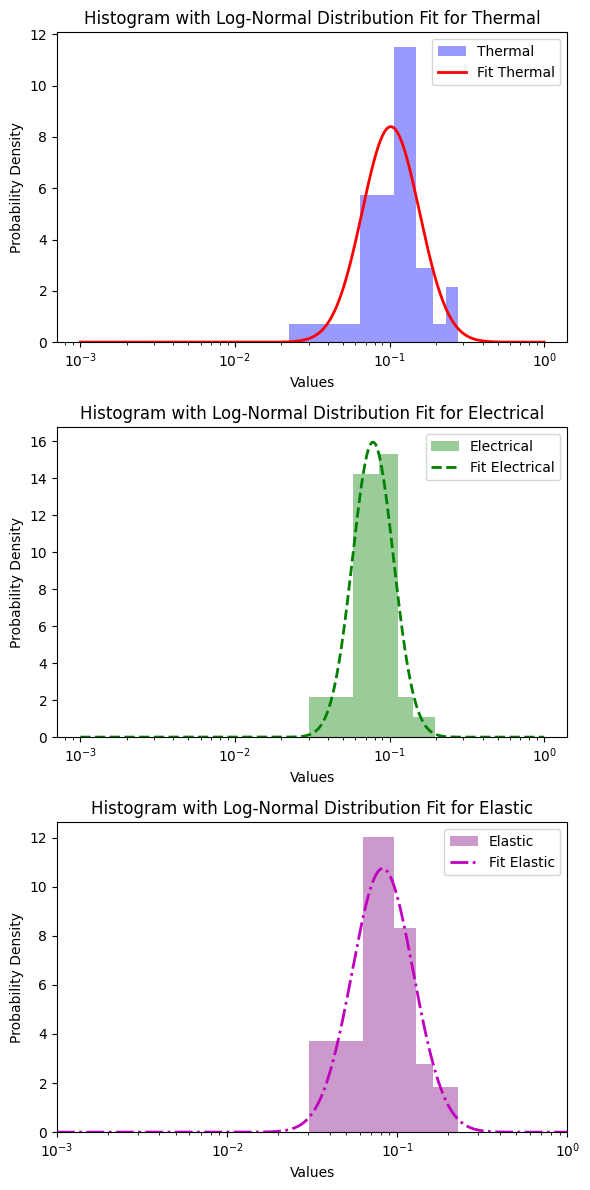

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# Assuming df_ues is your DataFrame and it's already defined
# data = df_ues['AR thermal'].dropna()
# data_elec = df_ues['AR electrical'].dropna()
# data_elas = df_ues['AR elastic'].dropna()

# Ensure all data is positive by filtering out non-positive values
data = data[data > 0]
data_elec = data_elec[data_elec > 0]
data_elas = data_elas[data_elas > 0]

# Fit the log-normal distribution
try:
    sigma, loc, scale = lognorm.fit(data, floc=0)
    sigma1, loc1, scale1 = lognorm.fit(data_elec, floc=0)
    sigma2, loc2, scale2 = lognorm.fit(data_elas, floc=0)

    x = np.logspace(-3, 0, 500)
    p = lognorm.pdf(x, sigma, loc, scale)
    p1 = lognorm.pdf(x, sigma1, loc1, scale1)
    p2 = lognorm.pdf(x, sigma2, loc2, scale2)

    fig, axs = plt.subplots(3, 1, figsize=(6, 12))  # 3 rows, 1 column

    # Plot for Thermal
    axs[0].hist(data, bins=6, density=True, alpha=0.4, color='blue', label='Thermal')
    axs[0].plot(x, p, 'r-', linewidth=2, label='Fit Thermal')
    axs[0].set_xlabel('Values')
    axs[0].set_ylabel('Probability Density')
    axs[0].set_xscale('log')
    axs[0].legend()
    axs[0].set_title('Histogram with Log-Normal Distribution Fit for Thermal')

    # Plot for Electrical
    axs[1].hist(data_elec, bins=6, density=True, alpha=0.4, color='green', label='Electrical')
    axs[1].plot(x, p1, 'g--', linewidth=2, label='Fit Electrical')
    axs[1].set_xlabel('Values')
    axs[1].set_ylabel('Probability Density')
    axs[1].set_xscale('log')
    axs[1].legend()
    axs[1].set_title('Histogram with Log-Normal Distribution Fit for Electrical')

    # Plot for Elastic
    axs[2].hist(data_elas, bins=6, density=True, alpha=0.4, color='purple', label='Elastic')
    axs[2].plot(x, p2, 'm-.', linewidth=2, label='Fit Elastic')
    axs[2].set_xlabel('Values')
    axs[2].set_ylabel('Probability Density')
    axs[2].set_xscale('log')
    axs[2].legend()
    axs[2].set_title('Histogram with Log-Normal Distribution Fit for Elastic')
    plt.xlim(10**-3, 10**0)

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

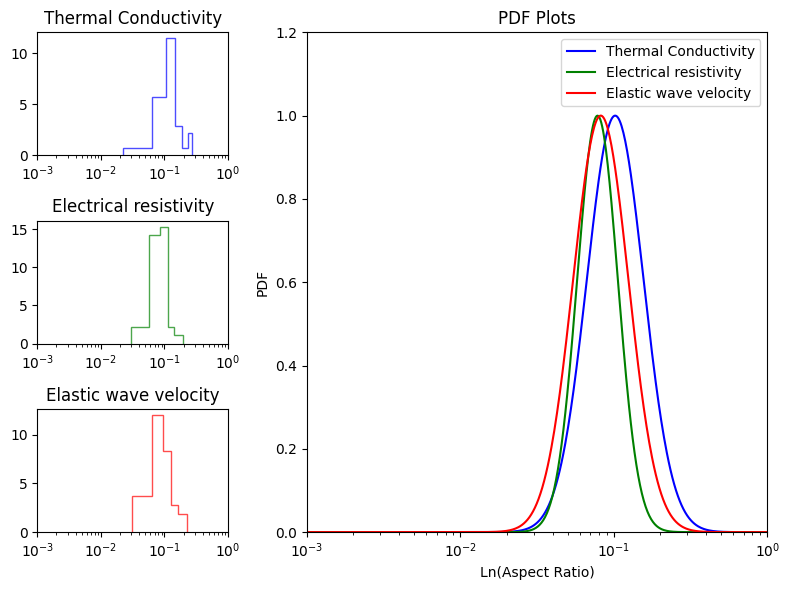

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from scipy.stats import lognorm

# Sample data generation and fitting (replace with your actual data)
data1 = df_ues['AR thermal'].dropna()  # Ensure data is clean by dropping NaNs
data2 = df_ues['AR electrical'].dropna()  # Ensure data is clean by dropping NaNs
data3 = df_ues['AR elastic'].dropna()  # Ensure data is clean by dropping NaNs

# Fit data to log-normal distributions
sigma1, loc1, scale1 = lognorm.fit(data1, floc=0)
sigma2, loc2, scale2 = lognorm.fit(data2, floc=0)
sigma3, loc3, scale3 = lognorm.fit(data3, floc=0)

# PDF x-values
x = np.logspace(-3, 0, 500)

# Create a figure with GridSpec
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(3, 3, figure=fig)

bins_amount = 6

# Create histograms in the first column
ax0 = fig.add_subplot(gs[0, 0])
ax0.hist(data1, bins=bins_amount, color='blue', alpha=0.7, density=True, histtype='step')
ax0.set_title("Thermal Conductivity")
ax0.set_xscale('log')
plt.xlim(10**-3, 10**0)

ax1 = fig.add_subplot(gs[1, 0])
ax1.hist(data2, bins=bins_amount, color='green', alpha=0.7, density=True, histtype='step')
ax1.set_title("Electrical resistivity")
ax1.set_xscale('log')
plt.xlim(10**-3, 10**0)

ax2 = fig.add_subplot(gs[2, 0])
ax2.hist(data3, bins=bins_amount, color='red', alpha=0.7, density=True, histtype='step')
ax2.set_title("Elastic wave velocity")
ax2.set_xscale('log')
plt.xlim(10**-3, 10**0)

# Normalize PDFs to have a maximum of 1
p1 = lognorm.pdf(x, sigma1, loc1, scale1)
p2 = lognorm.pdf(x, sigma2, loc2, scale2)
p3 = lognorm.pdf(x, sigma3, loc3, scale3)

p1 /= p1.max()
p2 /= p2.max()
p3 /= p3.max()

# Create one large plot for PDFs in the right part
ax3 = fig.add_subplot(gs[:, 1:])
ax3.plot(x, p1, 'b-', label='Thermal Conductivity')
ax3.plot(x, p2, 'g-', label='Electrical resistivity')
ax3.plot(x, p3, 'r-', label='Elastic wave velocity')
ax3.set_title("PDF Plots")
ax3.set_ylabel("PDF")
ax3.set_xlabel("Ln(Aspect Ratio)")
ax3.set_xscale('log')
ax3.legend()
plt.xlim(10**-3, 10**0)
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()

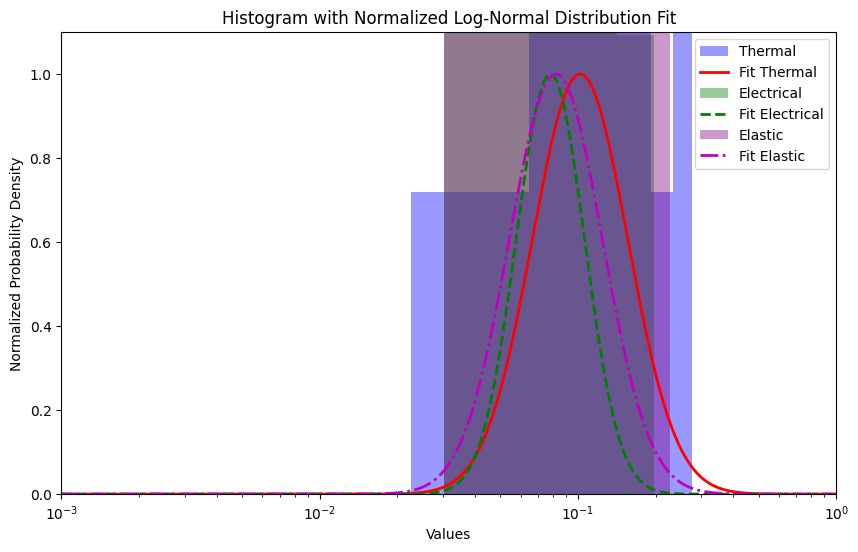

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# Assuming df_ues is your DataFrame and it's already defined
# data = df_ues['AR thermal'].dropna()
# data_elec = df_ues['AR electrical'].dropna()
# data_elas = df_ues['AR elastic'].dropna()

# Ensure all data is positive by filtering out non-positive values
data = data[data > 0]
data_elec = data_elec[data_elec > 0]
data_elas = data_elas[data_elas > 0]

# Fit the log-normal distribution
try:
    sigma, loc, scale = lognorm.fit(data, floc=0)
    sigma1, loc1, scale1 = lognorm.fit(data_elec, floc=0)
    sigma2, loc2, scale2 = lognorm.fit(data_elas, floc=0)

    x = np.logspace(-3, 0, 500)
    p = lognorm.pdf(x, sigma, loc, scale)
    p1 = lognorm.pdf(x, sigma1, loc1, scale1)
    p2 = lognorm.pdf(x, sigma2, loc2, scale2)

    # Normalize PDFs by their maximum values

    p = lognorm.pdf(x, sigma, loc, scale)
    p1 = lognorm.pdf(x, sigma1, loc1, scale1)
    p2 = lognorm.pdf(x, sigma2, loc2, scale2)
    p /= p.max()
    p1 /= p1.max()
    p2 /= p2.max()

    bin_amount = 6

    # Plot the histogram and overlay the curve
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bin_amount, density=True, alpha=0.4, color='blue', label='Thermal')
    plt.plot(x, p, 'r-', linewidth=2, label='Fit Thermal')
    plt.hist(data_elec, bins=bin_amount, density=True, alpha=0.4, color='green', label='Electrical')
    plt.plot(x, p1, 'g--', linewidth=2, label='Fit Electrical')
    plt.hist(data_elas, bins=bin_amount, density=True, alpha=0.4, color='purple', label='Elastic')
    plt.plot(x, p2, 'm-.', linewidth=2, label='Fit Elastic')

    plt.title('Histogram with Normalized Log-Normal Distribution Fit')
    plt.xlabel('Values')
    plt.ylabel('Normalized Probability Density')
    plt.gca().set_xscale('log')
    plt.legend()

    # Normalize y-axis across all plots
    plt.ylim(0, 1.1)  # Since all PDFs are normalized to a maximum of 1
    plt.xlim(10**-3, 10**0)

    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

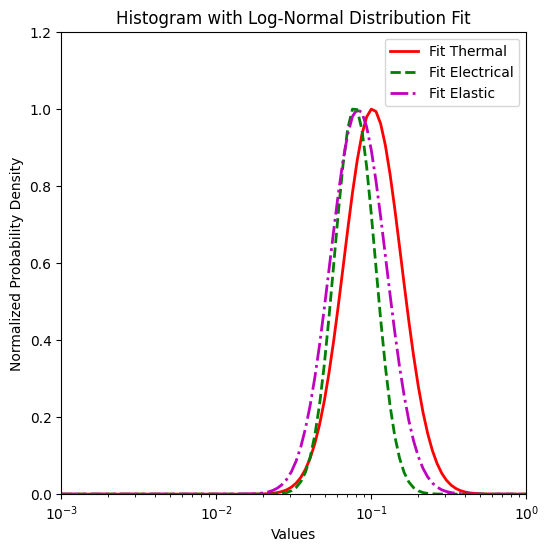

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# Assuming df_ues is your DataFrame and it's already defined
# data = df_ues['AR thermal'].dropna()
# data_elec = df_ues['AR electrical'].dropna()
# data_elas = df_ues['AR elastic'].dropna()

# Ensure all data is positive by filtering out non-positive values
data = data[data > 0]
data_elec = data_elec[data_elec > 0]
data_elas = data_elas[data_elas > 0]

# Fit the log-normal distribution
try:
    sigma, loc, scale = lognorm.fit(data, floc=0)
    sigma1, loc1, scale1 = lognorm.fit(data_elec, floc=0)
    sigma2, loc2, scale2 = lognorm.fit(data_elas, floc=0)

    x_min, x_max = 10**-3, 10**0

    # Generate values for the curve
    # x = np.logspace(np.log10(min(data.min(), data_elec.min(), data_elas.min())),
    #                 np.log10(max(data.max(), data_elec.max(), data_elas.max())), 500)

    x = np.logspace(-3, 0, 100)
    p = lognorm.pdf(x, sigma, loc, scale)
    p1 = lognorm.pdf(x, sigma1, loc1, scale1)
    p2 = lognorm.pdf(x, sigma2, loc2, scale2)

    # Normalize PDFs to have a maximum of 1
    p /= p.max()
    p1 /= p1.max()
    p2 /= p2.max()

    # Plot the histogram and overlay the curve
    plt.figure(figsize=(6, 6))
    # plt.hist(data, bins=7, density=True, alpha=0.7, color='blue', label='Thermal')
    plt.plot(x, p, 'r-', linewidth=2, label='Fit Thermal')
    # plt.hist(data_elec, bins=7, density=True, alpha=0.7, color='green', label='Electrical')
    plt.plot(x, p1, 'g--', linewidth=2, label='Fit Electrical')
    # plt.hist(data_elas, bins=7, density=True, alpha=0.7, color='purple', label='Elastic')
    plt.plot(x, p2, 'm-.', linewidth=2, label='Fit Elastic')

    plt.title('Histogram with Log-Normal Distribution Fit')
    plt.xlabel('Values')
    plt.ylabel('Normalized Probability Density')
    plt.gca().set_xscale('log')
    plt.legend()

    # Set y-axis from 0 to 1
    plt.ylim(0, 1.2)
    plt.xlim(10**-3, 10**0)

    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd

# Assuming df_ues is your DataFrame and it's already defined
# data = df_ues['AR thermal'].dropna()
# data_elec = df_ues['AR electrical'].dropna()
# data_elas = df_ues['AR elastic'].dropna()

# Ensure all data is positive by filtering out non-positive values
data = data[data > 0]
data_elec = data_elec[data_elec > 0]
data_elas = data_elas[data_elas > 0]

# Fit the log-normal distribution
try:
    sigma, loc, scale = lognorm.fit(data, floc=0)
    sigma1, loc1, scale1 = lognorm.fit(data_elec, floc=0)
    sigma2, loc2, scale2 = lognorm.fit(data_elas, floc=0)

    x = np.logspace(-3, 0, 100)
    p = lognorm.pdf(x, sigma, loc, scale)
    p1 = lognorm.pdf(x, sigma1, loc1, scale1)
    p2 = lognorm.pdf(x, sigma2, loc2, scale2)

    # Normalize PDFs to have a maximum of 1
    p /= p.max()
    p1 /= p1.max()
    p2 /= p2.max()

    # Create DataFrame
    df_pdf = pd.DataFrame({
        'x': x,
        'PDF_Thermal': p,
        'PDF_Electrical': p1,
        'PDF_Elastic': p2
    })

    # Save DataFrame to CSV with a custom separator
    df_pdf.to_excel('distribution_data.xlsx', index=False)

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df_pdf

,x,PDF_Thermal,PDF_Electrical,PDF_Elastic
0,0.001000,2.320488e-26,5.738387e-45,3.124415e-25
1,0.001072,1.359328e-25,1.458095e-43,1.838253e-24
2,0.001150,7.751707e-25,3.516513e-42,1.051386e-23
3,0.001233,4.303265e-24,8.049498e-41,5.845743e-23
4,0.001322,2.325556e-23,1.748862e-39,3.159641e-22
...,...,...,...,...
95,0.756463,1.531890e-05,1.030068e-12,6.056989e-07
96,0.811131,6.984233e-06,1.837526e-13,2.428513e-07
97,0.869749,3.099829e-06,3.111221e-14,9.465525e-08
98,0.932603,1.339321e-06,4.999870e-15,3.586488e-08
